In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from io import StringIO

In [2]:
data = pd.read_csv('usdtSentimet.csv')
data

,Unnamed: 0,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
0,2017-11-09 00:00:00+00:00,1.010870,1.013270,0.996515,1.008180,358188000,0.000000,0.000000,0.000000,1.006010,0
1,2017-11-10 00:00:00+00:00,1.006500,1.024230,0.995486,1.006010,756446016,0.000000,0.000000,0.000000,1.008990,1
2,2017-11-11 00:00:00+00:00,1.005980,1.026210,0.995799,1.008990,746227968,0.000000,0.000000,0.000000,1.012470,1
3,2017-11-12 00:00:00+00:00,1.006020,1.105910,0.967601,1.012470,1466060032,0.000000,0.000000,0.000000,1.009350,0
4,2017-11-13 00:00:00+00:00,1.004480,1.029290,0.975103,1.009350,767884032,0.000000,0.000000,0.000000,1.006830,0
...,...,...,...,...,...,...,...,...,...,...,...
2410,2024-06-15 00:00:00+00:00,0.999463,1.000000,0.999205,0.999467,35823242153,0.300000,-0.056709,0.080556,0.999293,0
2411,2024-06-16 00:00:00+00:00,0.999438,1.000105,0.999039,0.999293,31962850043,0.333333,-0.089898,0.113889,0.999645,1
2412,2024-06-17 00:00:00+00:00,0.999341,1.000182,0.999004,0.999645,60712949361,0.333333,-0.089898,0.113889,0.999550,0
2413,2024-06-18 00:00:00+00:00,0.999650,1.001334,0.999308,0.999550,78695656625,0.333333,-0.089898,0.113889,0.999822,1


In [3]:
features = ['open', 'high', 'low', 'close', 'volume', 'edit_count', 'sentiment', 'neg_sentiment']
target = 'target'

X = data[features]
y = data[target]


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
y_pred = model.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.6107660455486542
Confusion Matrix:
[[158  69]
 [119 137]]


In [9]:
import pandas as pd

# Read the CSV file
data_from_usdt = pd.read_csv("usdt.csv")

# Get the last row
last_row_usdt = data_from_usdt.iloc[-1]

print("Last row from usdt.csv:")
print(last_row_usdt)

Last row from usdt.csv:
Date            2024-06-19 00:00:00+00:00
Open                             0.999595
High                             1.000266
Low                              0.999475
Close                            0.999822
Volume                        67252600832
Dividends                             0.0
Stock Splits                          0.0
Name: 2414, dtype: object


In [10]:
import pandas as pd

# Read the CSV file
sentiment_from_usdt = pd.read_csv("tether_sentiment.csv")

# Get the last row
last_row_usdt_sentiment = sentiment_from_usdt.iloc[-1]

print("Last row from tether_sentiment.csv:")
print(last_row_usdt_sentiment)

Last row from tether_sentiment.csv:
Unnamed: 0       2024-06-19
edit_count         0.266667
sentiment         -0.059723
neg_sentiment      0.080556
Name: 5553, dtype: object


In [11]:
# Function to fetch the latest data for USDT
def fetch_latest_data():
    # This function should fetch the latest data from your real-time source
    latest_data = {
        "open": last_row_usdt['Open'],
        "high": last_row_usdt['High'],
        "low": last_row_usdt['Low'],
        "close": last_row_usdt['Close'],
        "volume": last_row_usdt['Volume'],
        "edit_count": last_row_usdt_sentiment['edit_count'],
        "sentiment": last_row_usdt_sentiment['sentiment'],
        "neg_sentiment": last_row_usdt_sentiment['neg_sentiment']
    }
    return latest_data


In [12]:
# Fetch and preprocess new data
latest_data = fetch_latest_data()
latest_df = pd.DataFrame([latest_data])
latest_df

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
0,0.999595,1.000266,0.999475,0.999822,67252600832,0.266667,-0.059723,0.080556


In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function to plot probabilities
def plot_probabilities(probabilities):
    labels = ['Decrease', 'Increase']
    values = probabilities[0]

    fig, ax = plt.subplots()
    ax.barh(labels, values, color=['red', 'green'])
    ax.set_xlim(0, 1)
    ax.set_xlabel('Probability')
    ax.set_title('Probability of tether Price Change')

    for index, value in enumerate(values):
        ax.text(value, index, f'{value:.2f}', va='center')

    plt.show()

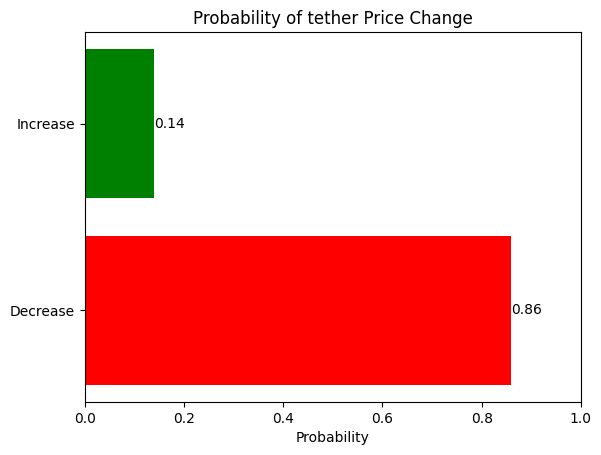

In [14]:
# Fetch the combined data
latest_data = fetch_latest_data()

# Create a DataFrame with the latest data
latest_df = pd.DataFrame([latest_data])

# Standardize the latest data
latest_X_scaled = scaler.transform(latest_df[features])

# Predict the probabilities
latest_probabilities = model.predict_proba(latest_X_scaled)

# Plot the probabilities
plot_probabilities(latest_probabilities)

In [15]:
print(f"Probability of price decrease: {latest_probabilities[0][0]:.2f}")
print(f"Probability of price increase: {latest_probabilities[0][1]:.2f}")

Probability of price decrease: 0.86
Probability of price increase: 0.14


In [16]:
import pickle 
with open('usdt_prob.pkl', 'wb') as f:
    pickle.dump(model, f)